# Estate Market Analysis

**Project Objective:**
The primary objective of this project is to assess the various parameters that impact the market value of real estate.


**Data Source:**
The project utilizes data obtained from Yandex.Estate, a service for posting real estate advertisements. 
The dataset includes the following variables:

- Last price
- Total area
- Living area
- Kitchen area
- Number of rooms
- Floor
- Locality name
- Distance to the city center
- Date of ad exposition

**RQs:**

1. Do total area, living area, kitchen area, and the number of rooms have a significant impact on the final sale price of real estate?
2. How does the floor category (e.g., ground floor, middle floor, top floor) influence the last price of real estate?
3. Is there a correlation between the date of ad exposition and the market value of real estate? 
4. Which localities exhibit the highest and lowest cost per square meter of real estate?
5. What is the relationship between the distance of a property to the city center and its overall cost in the real estate market?

**Tools and libraries:**
- Python
- Pandas
- Matplotlib

# Исследование объявлений о продаже квартир

**Аннотация проекта** 

На архивных данных сервиса Яндекс.Недвижимость о продаже квартир в Санкт-Петербурге и соседних населённых пунктах проведём исследование, результаты которого будут учтены при построении автоматизированной системы для отслеживания аномалий и мошеннической деятельности.

**Цель исследования** — оценить и установить параметры для определения рыночной стоимости объектов недвижимости. Исследование будет сфокусировано на следующих параметрах: *цена объекта, общая площадь, жилая площадь, площадь кухни, количество комнат, высота потолков, тип этажа квартиры, расстояние до центра города и до ближайшего парка*.

**Ход исследования**
1. Обзор данных.
2. Предобработка данных.
3. Исследовательский анализ данных.

**Описание данных**

Датасет содержит данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах с 2014 по 2019 год.

**Инструменты и библиотеки:**
- Python
- Pandas
- Matplotlib

## Обзор данных

In [1]:
# импортируем библиотеку pandas
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# считываем данные из csv-файла в df и выводим первые 10 строк таблицы
df = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')
# для отображения всех столбцов df
pd.set_option('display.max_columns', 50)
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
# выведем основную информацию о датафрейме с помощью метода info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Итак, в таблице 22 столбца, 17 из которых имеют числовой тип данных.

Согласно документации к данным:
* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
* `balcony` — число балконов  
* `ceiling_height` — высота потолков (м)
* `cityCenters_nearest` — расстояние до центра города (м)
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
* `first_day_exposition` — дата публикации
* `floor` — этаж
* `floors_total` — всего этажей в доме
* `is_apartment` — апартаменты (булев тип)  
* `kitchen_area` — площадь кухни в квадратных метрах (м²)
* `last_price` — цена на момент снятия с публикации
* `living_area` — жилая площадь в квадратных метрах (м²)
* `locality_name` — название населённого пункта
* `open_plan` — свободная планировка (булев тип)
* `parks_around3000` — число парков в радиусе 3 км
* `parks_nearest` — расстояние до ближайшего парка (м)
* `ponds_around3000` — число водоёмов в радиусе 3 км  
* `ponds_nearest` — расстояние до ближайшего водоёма (м)
* `rooms` — число комнат
* `studio` — квартира-студия (булев тип)
* `total_area` — общая площадь квартиры в квадратных метрах (м²)
* `total_images` — число фотографий квартиры в объявлении

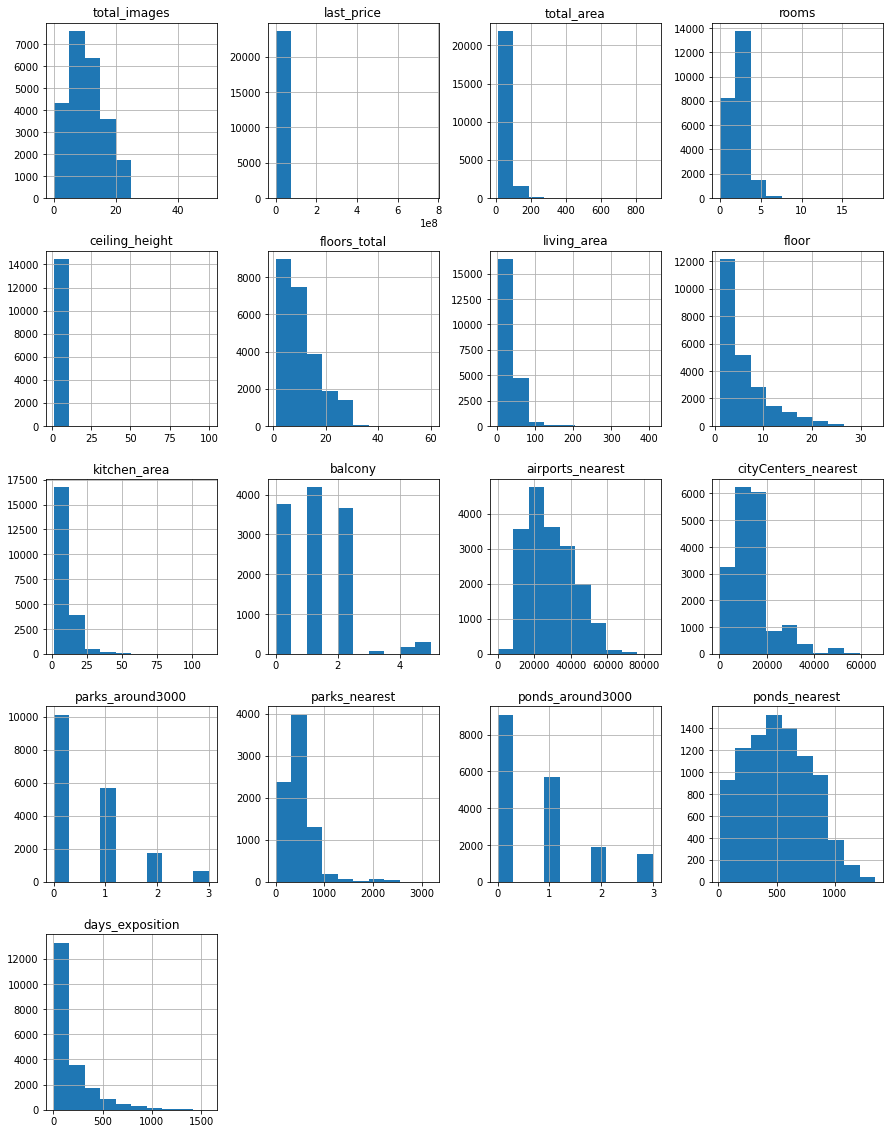

In [4]:
# построим гистограмму, чтобы получить наглядное представление о структуре данных
df.hist(figsize=(15, 20))
None

**Вывод:** 

Основываясь на предварительном обзоре датафрейма отметим следующее:
- Объёма данных достаточно для проверки гипотез исследования.
- При этом количество значений в столбцах различается. Значит, в данных есть пропущенные значения. 
- В названиях колонок есть расхождения с хорошим стилем. 

В этой связи, для дальнейшего анализа необходима предварительная обработка.

## Предобработка данных

In [5]:
# выведем перечень названий столбцов таблицы df
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [6]:
# переименуем столбец отличающийся по стилю
df = df.rename(columns = {'cityCenters_nearest': 'city_centers_nearest'})

In [7]:
# убедимся, что столбец соответствует единообразию
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [8]:
# определим в каких столбцах есть пропуски, используя комбинацию двух методов
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Перед тем как приступить к обработке данных оценим долю пропущенных значений по каждому столбцу, чтобы предупредить риски возможных потерь.

In [9]:
# вычислим процент пропусков для каждого столбца
missing_percentage = (df.isnull().mean() * 100).round(2)

# создадим таблицу с результатами
missing_data_info = pd.DataFrame({'Missing Percentage': missing_percentage})
missing_data_info

,Missing Percentage
total_images,0.00
last_price,0.00
total_area,0.00
first_day_exposition,0.00
rooms,0.00
ceiling_height,38.80
floors_total,0.36
living_area,8.03
floor,0.00
is_apartment,88.29


В данных довольно много столбцов с пропущенными значениями. Вместе с тем, не все пропущенные значения могут существенно повлиять на исследование. Так, пропуски в `floors_total`, `airports_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest` хотя и могут внести определенный вклад в определение стоимости объекта недвижимости, всё же в текущем анализе они не являются ключевыми, пока оставим их как есть. Аналогично поступим и с пропусками в `locality_name`, которые могли возникнуть по причине того, что продавец, размещая объявление в разделе сайта соответствующего города (квартиры в Санкт-Петербурге), не стал уточнять название населённого пункта. По той же причине могли появиться пропуски в `is_apartment`.

Отсутствие значений в `balcony` говорит о том, что продавец не указал число балконов, возможно потому, что в его квартире их нет. Это предположение может быть верным и в случае с пропусками в `kitchen_area`, если тип квартиры студия. Такие пропуски заменим на число 0. 

На практике было бы правильно установить причину пропусков и восстановить данные. Такой возможности нет в учебном проекте. Поэтому поступим следующим образом:
* заполним пропущенные значения явными обозначениями там, где это возможно
* оставим пропуски там, где невозможно предложить логичной замены
* оценим, может ли это исказить расчёты

Пропуски в таблице могли возникнуть по технологическим причинам. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполнялись атоматически. Возможно ошибки возникли при копировании, считывании, смене формата или во время записи данных. 
Кроме того, часть данных вносилась пользователем, поэтому нельзя исключать вероятность ошибок вызванных человеческим фактором. Так или иначе, пропущенные значения являются важным сигналом, который следует учитывать. 

Далее, наряду с пропусками, оценим наличие некорректных типов данных и аномальных значений по столбцам, которые вызывают вопросы.

In [10]:
# рассмотрим столбец ceiling_height
df['ceiling_height'].value_counts()

2.50     3515
2.60     1646
2.70     1574
3.00     1112
2.80      993
         ... 
4.25        1
3.39        1
3.93        1
10.30       1
4.65        1
Name: ceiling_height, Length: 183, dtype: int64

Чаще всего встречаются квартиры с высотой потолков 2.5 метров и выше. Что вполне характерно для подобного типа недвижимости. Вместе с тем, в данных очевидно присутствуют аномально большие значения. Чтобы узнать разброс значений по столбцу, среднюю и медиану, используем метод describe().

In [11]:
# используем метод describe(), чтобы узнать разброс значений по столбцу, среднюю и медиану 
df['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Mедиана от среднего значения отличается не значительно из-за обнаруженных аномалий. Поэтому пока оставим значения в столбце `ceiling_height` как есть.

In [12]:
# рассмотрим столбец living_area
df['living_area'].describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

Столбец `living_area` содержит данные о жилой площади в квадратных метрах (м²). При этом в данных очевидно слишком много знаков после запятой. Для заполнения пропущеных значений можно было бы вычислить средний показатель по выборке. Однако учитывая, что средние значения крайне чувствительны к выбросам, оставим этот столбец как есть.

In [13]:
# оценим значения в столбце is_apartment
df['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

Данный столбец содержит логические значения с уточнением типа недвижимости. Вероятно этот раздел появился на сайте сравнительно недавно судя по количеству пропусков. Пропущенные значения в столбце будут заменены на False как определённое значение по умолчанию.

In [14]:
# обработаем пропуски в is_apartment заменой на False
df['is_apartment'] = df['is_apartment'].fillna(False)

In [15]:
# заменим пустые значения в kitchen_area на 0 только в тех строках, где столбец studio имеет значение true
# используем .loc индексатор
df.loc[df['studio'], 'kitchen_area'] = 0

In [16]:
# заполним пропуски в balcony числом 0 и изменим тип данных на int
df['balcony'] = df['balcony'].fillna(0).astype('int')

Использование целых чисел (int) или чисел с плавающей запятой (float) зависит от характера данных и задач анализа. В данном случае, изменяя тип числовых данных с 'float' на 'int', мы с одной стороны предупреждаем некорректность будущих вычислений, если по какой-то причине в столбец попали строковые значения вместо чисел, с другой — вычисление с целочисленными данными может выполняться немного быстрее, чем с данными с плавающей запятой, из-за более простых арифметических операций.

Кроме того, столбец `balcony` хранит категориальные значения, поэтому для возможности выполнения последующих вычислений необходимо изменить тип данных на 'int'.

Довольно странным выглядит наличие пропущенных значений в столбце `days_exposition`. Обычно в подобных ресурсах объявления автоматически снимаются с публикации по истечении определенного срока. Вероятно будет разумным удалить эти данные, если они будут искажать картину по продажам. На данном этапе, не будем принимать поспешных решений, заполним пропуски и заменим тип данных.

In [17]:
# заполним пропуски в days_exposition и изменим тип данных на int
df['days_exposition'] = df['days_exposition'].fillna(0).astype('int')

In [18]:
# изменим значения в столбце last_price на тип int
df['last_price'] = df['last_price'].astype('int')

Для дальнейшего анализа нам могут понадобиться данные столбца с датой публикации объявлений. В первоначальном виде значения в столбце имеют не корректный формат. В частности, отсутствует указание времени. Переведем значения в соответствующий формат даты. 

In [19]:
# переведем значения в формат даты без указания времени
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format = '%Y-%m-%d')

In [20]:
# убедимся, что мы избавились от нежелательных пропусков
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2129
balcony                     0
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition             0
dtype: int64

Далее избавимся от неявных дубликатов в колонке `locality_name`. Например, название одного и того же населённого пункта может быть записано по-разному. Такие ошибки тоже повлияют на результат исследования.

In [21]:
# просмотр уникальных названий населённого пункта
df['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [22]:
# избавимся от части дубликатов вызванных употреблением 'ё', 'е' при вводе данных
df['locality_name'] = df['locality_name'].str.replace('ё', 'е')

In [23]:
# проверим результат
df['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалево',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Будогощь',
       'городской поселок Виллози', 'городской поселок Лесогорский',
       'городской поселок Мга', 'городской поселок Назия',
       'городской поселок Новоселье', 'городской поселок Павлово',
       'городской поселок Рощино', 'городской поселок Свирьстрой',
       'городской поселок Советский', 'городской поселок Фед

Список немного сократился, но всё еще очевидно наличие дубликатов. Продолжим избавляться от неявных дубликатов названий при помощи метода replace() с параметром regex=True, который указывает, что поиск и замену следует выполнять с использованием регулярных выражений т.е., для выполнения замен без учета регистра, чтобы оно соответствовало и другим вариантам написания букв.

In [24]:
# вызовем метод replace()
df['locality_name'] = (
    df['locality_name']
    .replace('городской поселок Большая Ижора', 'поселок городского типа Большая Ижора', regex=True)
)

In [25]:
df['locality_name'] = (
    df['locality_name']
    .replace('городской поселок Лесогорский', 'поселок городского типа Лесогорский', regex=True)
)

In [26]:
df['locality_name'] = (
    df['locality_name']
    .replace('городской поселок Мга', 'поселок городского типа Мга', regex=True)
)

In [27]:
df['locality_name'] = (
    df['locality_name']
    .replace('городской поселок Назия', 'поселок городского типа Назия', regex=True)
)

In [28]:
df['locality_name'] = (
    df['locality_name']
    .replace('городской поселок Павлово', 'поселок городского типа Павлово', regex=True)
)

In [29]:
df['locality_name'] = (
    df['locality_name']
    .replace('городской поселок Рощино', 'поселок городского типа Рощино', regex=True)
)

In [30]:
df['locality_name'] = (
    df['locality_name']
    .replace('городской поселок Советский', 'поселок городского типа Советский', regex=True)
)

In [31]:
df['locality_name'] = (
    df['locality_name']
    .replace('поселок Рябово', 'поселок городского типа Рябово', regex=True)
)

In [32]:
df['locality_name'] = (
    df['locality_name']
    .replace('деревня Щеглово', 'поселок Щеглово', regex=True)
)

In [33]:
df['locality_name'] = (
    df['locality_name']
    .replace('поселок при железнодорожной станции Вещево', 'поселок станции Вещево', regex=True)
)

In [34]:
df['locality_name'] = (
    df['locality_name']
    .replace('поселок при железнодорожной станции Приветнинское', 'поселок станции Приветнинское', regex=True)
)

In [35]:
# проверим результат
df['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалево',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Будогощь', 'городской поселок Виллози',
       'городской поселок Новоселье', 'городской поселок Свирьстрой',
       'городской поселок Федоровское', 'городской поселок Янино-1',
       'деревня Агалатово', 'деревня Аро', 'деревня Батово',
       'деревня Бегуницы', 'деревня Белогорка', 'деревня Большая Вруда',
       'деревня Большая Пустомержа', 'деревня Большие К

Теперь список выглядит значительно лучше. Неявные дубликаты устранены. Для дальнейшего анализа понадобятся определенные значения, которые будут храниться в отдельных столбцах.

Добавим в таблицу новые столбцы со значениями, которые будем использовать при исследовании. В частности, для анализа понадобятся:
- цена одного квадратного метра
- день недели публикации объявления
- месяц публикации объявления
- год публикации объявления
- тип этажа квартиры
- расстояние до центра города в километрах

In [36]:
# вычислим цену квадратного метра и округлим до двух знаков после запятой 
# добавим в таблицу новый столбец price_per_sqm
df['price_per_sqm'] = (df['last_price'] / df['total_area']).round(2)

In [37]:
# добавим столбец с данными о дне недели публикации объявления
df['day_exposed'] = df['first_day_exposition'].dt.weekday

In [38]:
# добавим столбец с данными о месяце публикации объявления
df['month_exposed'] = df['first_day_exposition'].dt.month

In [39]:
# добавим столбец с данными о годе публикации объявления
df['year_exposed'] = df['first_day_exposition'].dt.year

Создадим собственную функцию categorize_floor(), которая назначает тип этажа квартиры в зависимости от указанных данных в столбцах `floor` и `floors_total`. Создадим отдельный столбец в ячейках которого будут записаны возвращаемые функцией значения.

In [40]:
# определим функцию categorize_floor(), используя конструкцию try - except для обработки исключений
def categorize_floor(row):
    try:
        if row['floor'] == 1:
            return 'первый'
        elif row['floor'] == row['floors_total']:
            return 'последний'
        else:
            return 'другой'
    except:
        pass

In [41]:
# применим функцию к каждой строке, используя apply(axis=1)
df['floor_category'] = df.apply(categorize_floor, axis=1)

In [42]:
# создадим новый столбец 'distance_to_center_km' с данными о расстоянии до центра города в км
# назначим переменную с коэффициентом пересчета как 1/1000
meters_to_kilometers = 1 / 1000

# применим конвертацию и округление к столбцу 'city_centers_nearest'
df['distance_to_center_km'] = (df['city_centers_nearest'] * meters_to_kilometers).round()

In [43]:
# убедимся, что новые столбцы есть в датафрейме
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'price_per_sqm', 'day_exposed',
       'month_exposed', 'year_exposed', 'floor_category',
       'distance_to_center_km'],
      dtype='object')

**Вывод:**

На предварительном этапе мы изучили основную информацию о датафрейме, определили количество и тип данных в таблице, обработали аномальные значения и пропуски, изменили тип значений в некоторых столбцах, избавились от дубликатов и убедились, что все данные отображаются корректно. 

Кроме того, мы добавили в таблицу новые столбцы с параметрами необходимыми для дальнейшего ислледования, а также определили функцию `categorize_floor()`, которая позволила объединить данные столбца 'floor' в категории, чтобы численности типов этажа недвижимости было достаточно для формулировки выводов.

В таком виде данные готовы к более подробному исследовательскому анализу.

Оценка рыночной стоимости объектов недвижимости в данном исследовании будет исходить из наблюдаемых зависимостей цены от таких параметров как: *общая площадь, жилая площадь, площадь кухни, цена объекта, количество комнат, высота потолков, тип этажа квартиры, общее количество этажей в доме, расстояние до центра города в метрах, расстояние до ближайшего парка*. Это позволит сформулировать наиболее достоверные выводы, которые будут учтены при построении автоматизированной системы для отслеживания аномалий и мошеннической деятельности.

## Исследовательский анализ данных

Изучим параметры на предмет корректности значений, чтобы свести к минимуму вероятность ошибок в формате и искажение данных. Построим отдельные гистограммы по каждому параметру, чтобы оценить как часто в наборе данных встречается то или иное значение.

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

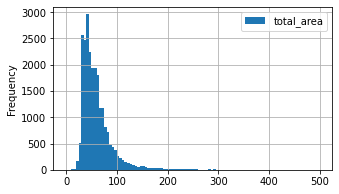

In [44]:
# рассмотрим значения по столбцу 'общая площадь'
df.plot(y='total_area', kind='hist', bins=100, grid=True, figsize=(5, 3), range=(0, 500))
df['total_area'].describe()

Заметные на гистограмме нюансы распределения также отражены и в числовом описании данных. 
- Общая площадь недвижимости в выборке находится в пределах 12 м² (min) и 900 м² (max). 
- Средний показатель составляет 60 м², а медиана 52 м². 
- В целом форма графика показывает, что крайние значения встречаются довольно редко. Есть выбросы, при этом они не сильно влияют на общую картину.

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

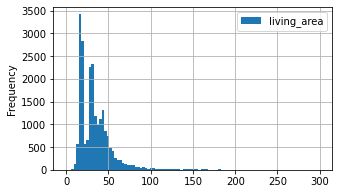

In [45]:
# оценим данные по столбцу 'жилая площадь' 
df.plot(y='living_area', kind='hist', bins=100, grid=True, figsize=(5, 3), range=(0, 300))
df['living_area'].describe()

На гистограмме отчетливо выделяются два высоких пика около 20 и 30. По-видимому, наиболее часто продавцы квартир указывают размеры жилой площади примерно 20 и 30 м². Кроме того, в числовом описании данных минимальная жилая площадь равняется двум, а максимальная 409.7. Эти значения могут иметь аномальную природу.

In [46]:
# рассмотрим квартиры с минимальными значениями в столбце 
# отсортируем таблицу по возрастанию и выведем первые 10 строк
df.sort_values('living_area').head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sqm,day_exposed,month_exposed,year_exposed,floor_category,distance_to_center_km
21758,0,2330000,23.0,2018-01-01,0,NaN,24.0,2.0,22,False,True,False,0.0,0,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,66,101304.35,0,1,2018,другой,NaN
13915,20,6350000,52.0,2018-02-06,2,3.0,6.0,2.0,2,False,False,False,9.0,0,Санкт-Петербург,32453.0,6521.0,0.0,NaN,1.0,1012.0,91,122115.38,1,2,2018,другой,7.0
23574,14,64990000,139.0,2015-11-24,3,3.0,8.0,3.0,8,False,False,False,16.0,1,Санкт-Петербург,33255.0,5975.0,1.0,630.0,3.0,100.0,280,467553.96,1,11,2015,последний,6.0
3242,7,4440000,41.0,2017-07-02,1,NaN,17.0,3.0,17,False,False,False,11.0,0,Санкт-Петербург,19272.0,13073.0,0.0,NaN,0.0,NaN,216,108292.68,6,7,2017,последний,13.0
17582,11,2680000,22.0,2018-08-11,0,NaN,25.0,5.0,8,False,True,False,0.0,2,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,70,121818.18,5,8,2018,другой,12.0
21943,15,6100000,77.6,2019-02-28,4,2.5,9.0,5.4,1,False,False,False,9.8,0,Санкт-Петербург,29338.0,11270.0,1.0,584.0,0.0,NaN,33,78608.25,3,2,2019,первый,11.0
16431,13,3799000,31.0,2018-04-12,1,2.6,5.0,6.0,1,False,False,False,17.0,0,Санкт-Петербург,32177.0,4826.0,1.0,430.0,0.0,NaN,168,122548.39,3,4,2018,первый,5.0
19251,19,4050000,33.0,2018-10-15,1,2.5,22.0,6.5,21,False,False,False,18.0,0,Санкт-Петербург,9258.0,10592.0,1.0,458.0,0.0,NaN,44,122727.27,0,10,2018,другой,11.0
20994,7,8900000,50.6,2018-10-22,2,2.5,7.0,8.0,3,False,False,False,31.0,0,Санкт-Петербург,12771.0,8301.0,1.0,173.0,3.0,126.0,0,175889.33,0,10,2018,другой,8.0
23208,12,4800000,37.0,2016-02-24,1,NaN,14.0,8.0,11,False,False,False,22.0,0,Санкт-Петербург,27838.0,12387.0,2.0,358.0,1.0,950.0,139,129729.73,2,2,2016,другой,12.0


In [47]:
# рассмотрим квартиры с максимальными значениями в столбце 
# отсортируем таблицу по убыванию и выведем первые 10 строк
df.sort_values('living_area', ascending=False).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sqm,day_exposed,month_exposed,year_exposed,floor_category,distance_to_center_km
19540,8,420000000,900.0,2017-12-06,12,2.80,25.0,409.7,25,False,False,False,112.0,0,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106,466666.67,2,12,2017,последний,8.0
5358,20,65000000,590.0,2019-02-14,15,3.50,6.0,409.0,3,False,False,False,100.0,0,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14,110169.49,3,2,2019,другой,5.0
12401,20,91500000,495.0,2017-06-19,7,4.65,7.0,347.5,7,False,False,False,25.0,0,Санкт-Петербург,NaN,5735.0,2.0,110.0,0.0,NaN,14,184848.48,0,6,2017,последний,6.0
4237,1,50000000,517.0,2017-10-14,7,NaN,4.0,332.0,3,False,False,False,22.0,0,Санкт-Петербург,22835.0,1847.0,2.0,477.0,2.0,540.0,0,96711.80,5,10,2017,другой,2.0
12859,20,140000000,631.2,2019-04-09,7,3.90,4.0,322.3,4,False,False,False,19.5,1,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,0,221799.75,1,4,2019,последний,5.0
660,3,49950000,483.9,2017-10-04,7,3.20,6.0,312.5,4,False,False,False,26.4,0,Санкт-Петербург,23079.0,945.0,3.0,461.0,3.0,22.0,391,103223.81,2,10,2017,другой,1.0
8018,20,84000000,507.0,2015-12-17,5,4.45,7.0,301.5,7,True,False,False,45.5,1,Санкт-Петербург,NaN,5735.0,2.0,110.0,0.0,NaN,1078,165680.47,3,12,2015,последний,6.0
14088,8,51000000,402.0,2017-02-07,6,3.15,8.0,300.0,6,False,False,False,56.0,2,Санкт-Петербург,24484.0,5052.0,1.0,253.0,0.0,NaN,32,126865.67,1,2,2017,другой,5.0
20273,12,20000000,460.8,2019-03-20,6,3.10,3.0,279.6,1,False,False,False,55.5,0,Санкт-Петербург,43756.0,15459.0,1.0,852.0,3.0,122.0,21,43402.78,2,3,2019,первый,15.0
22494,7,91075000,491.0,2017-05-27,5,4.20,9.0,274.0,9,False,False,False,45.0,0,Санкт-Петербург,25525.0,5845.0,2.0,116.0,0.0,NaN,115,185488.80,5,5,2017,последний,6.0


Вызывает сомнения реалистичность данных в плане соотношения цены, общей площади и жилой площади квартир с минимальными и максимальными значениями по столбцу.

Нетипично маленькие/большие значения жилой площади признаем аномальными и избавимся от них. Во-первых, их немного. Во-вторых, вероятно, это не квартиры, а комнаты в коммунальных квартирах, или комерческие помещения, значит, данный тип недвижимости не входит в фокус нашего исследования.

Примем нижнюю границу в 10 м², а верхнюю установим на 300 м². Это представляется вполне разумным. Если отбросить значения меньше 10 и больше 300, много данных не потеряется.

Однако прежде чем избавиться от значений, оценим сколько процентов данных может быть потеряно.

In [48]:
# посчитаем общее число строк в df
original_df = len(df)

In [49]:
# отфильтруем данные согласно условиям и сохраним их в filtered_df 
filtered_df = df.query('(living_area >= 10) and (living_area <= 300)')

In [50]:
# посчитаем общее число строк в filtered_df
good_rows = len(filtered_df)

In [51]:
# вычислим число удаленных строк
removed_rows = original_df - good_rows

In [52]:
# рассчитаем процент потерь
percentage_removed = (removed_rows / original_df) * 100

# выведем результат
print(f"Процент отброшенных аномальных значений: {percentage_removed:.2f}%")

Процент отброшенных аномальных значений: 8.16%


Потери составляют не более 10%, поэтому смело избавляяемся от аномальных значений.

In [53]:
# фильтруем датафрейм при помощи логической индексации
df = df[(df['living_area'] >= 10) & (df['living_area'] <= 300)]

count    21090.000000
mean        10.427545
std          5.795650
min          0.000000
25%          7.000000
50%          9.000000
75%         12.000000
max        107.000000
Name: kitchen_area, dtype: float64

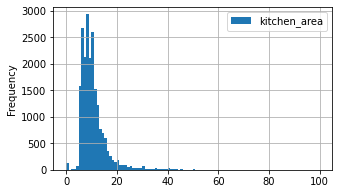

In [54]:
# оценим данные по столбцу 'площадь кухни' 
df.plot(y='kitchen_area', kind='hist', bins=100, grid=True, figsize=(5, 3), range=(0, 100))
df['kitchen_area'].describe()

На предыдущем этапе пропущенные значения в `kitchen_area` были заполнены на 0 только в тех строках, где столбец `studio` имеет истинное значение (true). Решение основывалось на том, что если продавец не указал площадь кухни, то, скорее всего, квартира относится к типу студии. В этой связи, на гистограмме представлен не большой пик около нуля. Выдаются три наиболее ярких пика в районе значений 5, 10 и 15.

count    2.176400e+04
mean     6.461481e+06
std      1.041543e+07
min      1.219000e+04
25%      3.450000e+06
50%      4.650000e+06
75%      6.750000e+06
max      7.630000e+08
Name: last_price, dtype: float64

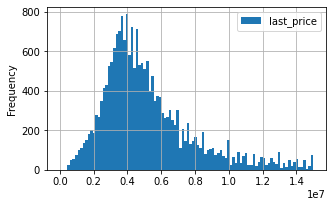

In [55]:
# рассмотрим данные по столбцу 'цена объекта' 
df.plot(y='last_price', kind='hist', bins=100, grid=True, figsize=(5, 3), range=(0, 15000000))
df['last_price'].describe()

Распределение значений на гистограмме отражены и в числовом описании данных. Значения выражены в экспоненциальной форме. Так, цена объектов недвижимости находится в диапазоне 12 190 (min) и 763 000 000 (max), средний показатель составляет 1 000 000, а медиана  4 650 000.

count    21764.000000
mean         2.070621
std          1.072573
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

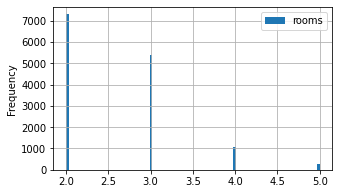

In [56]:
# рассмотрим данные по столбцу 'количество комнат'
df.plot(y='rooms', kind='hist', bins=100, grid=True, figsize=(5, 3), range=(2, 5))
df['rooms'].describe()

Наиболее часто в столбце встречаются двухкомнатные квартиры, реже квартиры с тремя и более комнатами. Гистограмма и числовое описание данных не вызывают больших вопросов в плане корректности, за исключением максимального значения по столбцу, но похоже что оно практически не влияет на разрыв значений средней и медианы. Поэтому пока оставим данные как есть.

count    13684.000000
mean         2.772861
std          1.295751
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

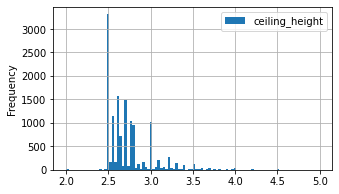

In [57]:
# рассмотрим данные по столбцу 'высота потолков'
df.plot(y='ceiling_height', kind='hist', bins=100, grid=True, figsize=(5, 3), range=(2, 5))
df['ceiling_height'].describe()

На гистограмме очевидно наличие редких и выбивающиеся значений. Максимальна высота потолка 100 м выглядет необъяснимо странным для квартиры, также как и минимальная высота 1 м. При этом средняя высота потолка составляет 2.77 м, что вполне реалистично. Вероятно при вводе данных произошла ошибка.

Оценим как много строк потеряется, если отбросить подозрительно низкие и высокие потолки? Посчитаем долю квартир с высотой потолка более 5 метров:

In [58]:
# делим количество потолков выше 5 метров на общее число квартир
print(len(df.query('ceiling_height > 5')) / len(df))

0.0015622128285241684


In [59]:
# делим количество потолков ниже 2 метров на общее число квартир
print(len(df.query('ceiling_height < 2.5')) / len(df))

0.003078478220915273


Доли таких аномально высоких и низких значений несущественные. Если от них избавиться, то данные не будут искажены.
Примем реалистичные для жилой квартиры границы высоты потолка — минимальная высота 2.5 метров, максимальная высота 5 метров.

In [60]:
# фильтруем датафрейм при помощи логической индексации
df = df[(df['ceiling_height'] >= 2.5) & (df['ceiling_height'] <= 5.0)]

count    13583.000000
mean         2.726161
std          0.269036
min          2.500000
25%          2.520000
50%          2.650000
75%          2.800000
max          4.900000
Name: ceiling_height, dtype: float64

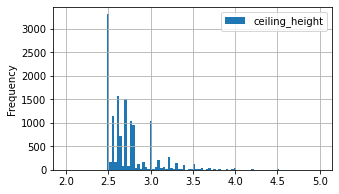

In [61]:
# оценим данные после фильтрации
df.plot(y='ceiling_height', kind='hist', bins=100, grid=True, figsize=(5, 3), range=(2, 5))
df['ceiling_height'].describe()

Чаще всего встречаются квартиры с высотой потолков 2.5 метров. Что вполне характерно для подобного типа недвижимости.
В числовом описании данных можно заметить, что разница между средним и медианным значениями несколько сократилась.

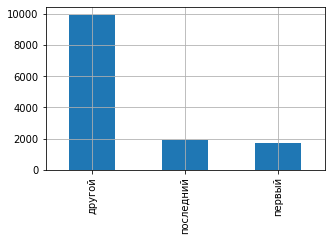

In [62]:
# рассмотрим данные по столбцу 'тип этажа квартиры'
df['floor_category'].value_counts().plot(kind='bar', grid=True, figsize=(5, 3))
plt.show()

График по столбцу, добавленному на предыдущем этапе с категориями типов этажа квартиры, показывает, что наиболее часто представлены квартиры между первым и верхним этажами. Квартиры на первом этаже встречаются реже, чем на самом верхнем. Вероятно это связано с тем, что первый этаж зданий часто занимают коммерческие площади.

count    13577.000000
mean        10.209030
std          6.197334
min          1.000000
25%          5.000000
50%          9.000000
75%         14.000000
max         60.000000
Name: floors_total, dtype: float64

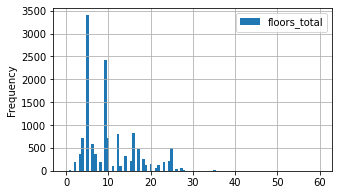

In [63]:
# рассмотрим данные по столбцу 'общее количество этажей в доме'
df.plot(y='floors_total', kind='hist', bins=100, grid=True, figsize=(5, 3), range=(0, 60))
df['floors_total'].describe()

Максимальное значение в 60 этажей выглядет необычным для жилого дома в Санкт-Петербурге. В данные по ошибке могла попасть коммерческая недвижимость, которая не является целью данного исследования. На практике следовало бы уточнить эту информацию. В рамках учебного проекта оценим как много строк потеряется, если отбросить подозрительно высокие здания.

In [64]:
# делим количество зданий выше 35 этажей на общее число зданий
print(len(df.query('floors_total > 35')) / len(df))

0.00022086431568872855


In [65]:
# доля крайне высоких зданий невелика, их удаление не исказит общую картину
# фильтруем датафрейм при помощи логической индексации
df = df[df['floors_total'] <= 35]

count    13574.000000
mean        10.200383
std          6.168876
min          1.000000
25%          5.000000
50%          9.000000
75%         14.000000
max         35.000000
Name: floors_total, dtype: float64

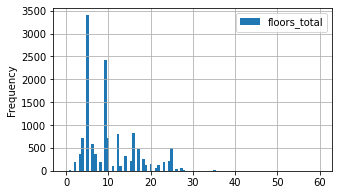

In [66]:
# оценим данные после фильтрации
df.plot(y='floors_total', kind='hist', bins=100, grid=True, figsize=(5, 3), range=(0, 60))
df['floors_total'].describe()

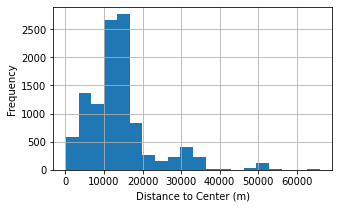

In [67]:
# рассмотрим данные по столбцу 'расстояние до центра города в метрах'
plt.figure(figsize=(5, 3))
plt.hist(df['city_centers_nearest'], bins=20)
# добавим обозначения
plt.xlabel('Distance to Center (m)')
plt.ylabel('Frequency')
# линия сетки на графике
plt.grid(True)
# выведем гистограмму
plt.show()

График показывает, что наиболее часто в продаже встречается недвижимость, которая расположена в пределах от 10 до 15 километров до центра города. Очевидно владельцы недвижимости расположенной в пределах центра города Санкт-Петербурга значительно реже выставляют квартиры на продажу.

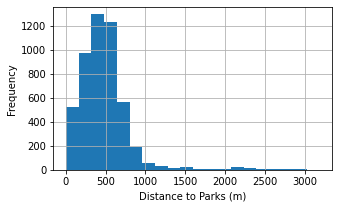

In [68]:
# рассмотрим данные по столбцу 'расстояние до ближайшего парка'
plt.figure(figsize=(5, 3))
plt.hist(df['parks_nearest'], bins=20)
# добавим обозначения
plt.xlabel('Distance to Parks (m)')
plt.ylabel('Frequency')
# линия сетки на графике
plt.grid(True)
# выведем гистограмму
plt.show()

Гистограмма показывает, что наиболее часто в продаже встречается недвижимость, которая расположена в районе 500 метров до ближайшего парка. Хранящаяся в датафрейме информация о расположении объектов была получена автоматически на основе картографических данных.

### Изучим, как быстро продавались квартиры

In [69]:
# рассмотрим числовое описание данных о том, сколько дней было размещено объявление (от публикации до снятия)
df['days_exposition'].describe()

count    13574.000000
mean       159.706350
std        221.172009
min          0.000000
25%         16.000000
50%         74.000000
75%        204.750000
max       1580.000000
Name: days_exposition, dtype: float64

Всего количество объявлений составляет 13574. Максимальная продолжительность размещения объявления 1580 дней, а минимальная 0, что вызывает сомнения. При этом среднее почти в два раза больше медианы. Посмотрим на распределение значений.

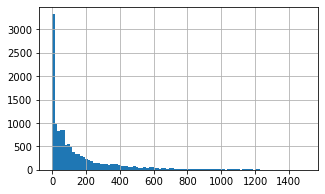

In [70]:
# построим гистограмму
df['days_exposition'].hist(bins=100, figsize=(5, 3), range=(0, 1500))
None

Критический пик около 0 дней. Широкий пик около 100. Очень мало значений после 800. Распределение значений обрезано на нуле и имеет длинный «хвост» в положительную сторону, что типично для формы распределения Пуассона, где при небольших значениях распределение смещено влево, а с увеличением числа событий становится симметричным и уходит вправо.

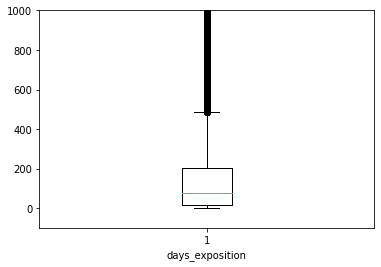

In [71]:
# построим диаграмму размаха, чтобы визуально оценить характеристики распределения
plt.boxplot(df['days_exposition'])
plt.ylim(-100, 1000)
plt.xlabel('days_exposition')
None

Очевидно, что большая часть значений находится в диапазоне до 200 дней. При этом первый квартиль лежит на уровне менее 50 дней.
Нижний «ус» упирается в 0, минимальное значение. Верхний заканчивается около 500 дней. Это ориентировочная граница нормального размаха. Значения за этой границей, считаются выбросом. Более высокие значения обозначены отдельными точками, но сливаются в единую жирную линию: таких выбросов довольно много.

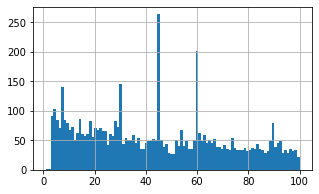

In [72]:
# рассмотрим данные более прицельно с учётом выясненных границ нормального размаха   
df.query('days_exposition < 500')['days_exposition'].hist(bins=100, grid=True, figsize=(5, 3), range=(1, 100))
None

График показывает два наиболее выдающихся пика на значениях 45 и 60. Согласно правилам Яндекс.Недвижимости объявления автоматически снимаются с публикции на 45-й и 60-й день, в зависимости от типа. Поэтому будет оправданным избавиться от этих значений, так как они искажают реалистичную картину продаж.

count    9698.000000
mean      135.959167
std       122.769696
min         1.000000
25%        37.000000
50%        97.000000
75%       198.000000
max       499.000000
Name: days_exposition, dtype: float64

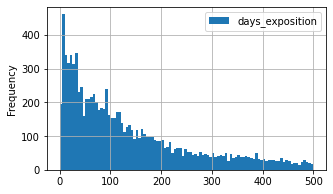

In [73]:
# фильтруем данные согласно условиям 
# запишем очищенные от выбросов данные в новый датафрейм
filtered_df = df.query('days_exposition < 500 and days_exposition != 45 and days_exposition != 60 and days_exposition != 0')
# построим гистограмму
filtered_df.plot(y='days_exposition', kind='hist', bins=100, grid=True, figsize=(5, 3), range=(0, 500))
# выведем числовые описания
filtered_df['days_exposition'].describe()

Очищенные от выбросов данные имеют более согласованный вид. Разница между средним значением и медианой существенно сократилась. 
Принимая условие, что объявления были закрыты в связи с продажей квартир, продажи до 50 дней после размещения объявления можно считать быстрыми. В то время как долгими можно считать продажи от 200 дней и более.

### Какие факторы больше всего влияют на общую (полную) стоимость объекта?

**Есть ли зависимость между общей площадью и ценой объекта недвижимости?**

Для более полного анализа взаимосвязи между общей площадью и стоимостью квартир, вычислим следующие статистические данные:
- Средняя цена `last_price` для каждого уникального значения `total_area`
- Сколько квартир (строк в данных) имеют конкретную `total_area`
- Медиана, которая дает среднее значение `last_price` для каждой группы `total_area`

In [74]:
# создадим сводную таблицу для расчета средней 'last_price' для каждой 'total_area'
total_area_pivot = df.pivot_table(index='total_area', values='last_price', aggfunc=['mean', 'count', 'median'])
total_area_pivot.columns = ['mean', 'count', 'median']

In [75]:
# отсортируем таблицу по убыванию
total_area_pivot.sort_values('median', ascending=False)

,mean,count,median
total_area,,,
618.00,300000000.0,1,300000000.0
187.50,289238400.0,1,289238400.0
285.70,245000000.0,1,245000000.0
410.00,240000000.0,1,240000000.0
347.00,180000000.0,1,180000000.0
...,...,...,...
27.32,1315000.0,1,1315000.0
29.62,1300000.0,1,1300000.0
28.60,1720000.0,4,1030000.0


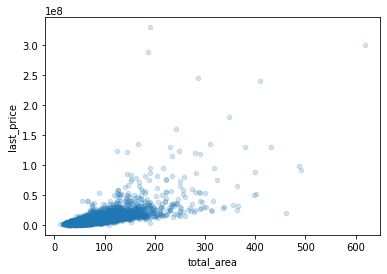

In [76]:
# постороим график
df.plot(x='total_area', y='last_price', kind='scatter', alpha=0.2)
None

In [77]:
# вычислим коэффициент корреляции Пирсона, чтобы оценить характер связи
df['total_area'].corr(df['last_price'])

0.6855484977908696

**Вывод:**

Полученный коэффициент корреляции 0,686 указывает на умеренную положительную линейную корреляцию между общей площадью и ценой недвижимости. То есть, существует заметная тенденция, заключающаяся в том, что квартиры большего размера, как правило, имеют более высокие цены. При этом корреляция не подразумевает причинно-следственной связи. На цены квартир могут повлиять и другие факторы.

**Есть ли зависимость между жилой площадью и ценой объекта недвижимости?**

In [78]:
# создадим сводную таблицу для расчета средней 'last_price' для каждой 'living_area'
living_area_pivot = df.pivot_table(index='living_area', values='last_price', aggfunc=['mean', 'count', 'median'])
living_area_pivot.columns = ['mean', 'count', 'median']

In [79]:
# отсортируем таблицу по убыванию
living_area_pivot.sort_values('median', ascending=False)

,mean,count,median
living_area,,,
258.00,300000000.0,1,300000000.0
182.80,245000000.0,1,245000000.0
218.00,240000000.0,1,240000000.0
260.00,180000000.0,1,180000000.0
150.00,131000000.0,1,131000000.0
...,...,...,...
26.28,1720000.0,1,1720000.0
16.31,1700000.0,1,1700000.0
12.81,1690715.0,1,1690715.0


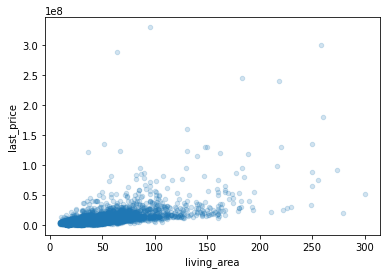

In [80]:
# постороим график
df.plot(x='living_area', y='last_price', kind='scatter', alpha=0.2)
None

In [81]:
# вычислим коэффициент корреляции Пирсона, чтобы оценить характер связи
df['living_area'].corr(df['last_price'])

0.5975984659886425

**Вывод:**

Значение 0,598 предполагает умеренную степень корреляции. Другими словами, существует заметная тенденция, заключающаяся в том, что большие жилые площади обычно связаны с более высокими ценами.

**Есть ли зависимость между площадью кухни и ценой объекта недвижимости?**

In [82]:
# создадим сводную таблицу для расчета средней 'last_price' для каждой 'kitchen_area'
kitchen_area_pivot = df.pivot_table(index='kitchen_area', values='last_price', aggfunc=['mean', 'count', 'median'])
kitchen_area_pivot.columns = ['mean', 'count', 'median']

In [83]:
# отсортируем таблицу по убыванию
kitchen_area_pivot.sort_values('median', ascending=False)

,mean,count,median
kitchen_area,,,
70.00,300000000.0,1,300000000.0
30.20,151094200.0,2,151094200.0
29.80,126000000.0,2,126000000.0
72.00,122000000.0,1,122000000.0
25.86,86738800.0,1,86738800.0
...,...,...,...
6.22,1720000.0,1,1720000.0
4.40,1700000.0,1,1700000.0
6.23,1700000.0,1,1700000.0


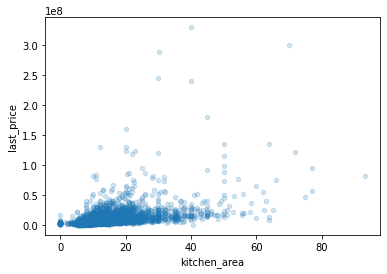

In [84]:
# постороим график
df.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.2)
None

In [85]:
# вычислим коэффициент корреляции Пирсона, чтобы оценить характер связи
df['kitchen_area'].corr(df['last_price'])

0.5196228979534426

**Вывод:**

Положительная корреляция указывает на то, что по мере увеличения площади кухни цена квартиры также имеет тенденцию к увеличению. Что вполне предсказуемо в данном случае, так как большое кухонное пространство предполагает наличие большой общей площади квартиры, которая в свою очередь связана с увеличением общей стоимости. 

**Есть ли зависимость между количеством комнат и ценой объекта недвижимости?**

In [86]:
# создадим сводную таблицу для расчета средней 'last_price' для каждой 'rooms'
rooms_pivot = df.pivot_table(index='rooms', values='last_price', aggfunc=['mean', 'count', 'median'])
rooms_pivot.columns = ['mean', 'count', 'median']

In [87]:
# отсортируем таблицу по убыванию
rooms_pivot.sort_values('median', ascending=False)

,mean,count,median
rooms,,,
16,2.850000e+07,1,28500000
9,3.945315e+07,6,26500000
11,2.525000e+07,2,25250000
14,2.500000e+07,1,25000000
7,3.756486e+07,37,24900000
10,2.616667e+07,3,23000000
8,4.858167e+07,6,21045000
6,3.154598e+07,69,18250000
5,2.133618e+07,207,14000000


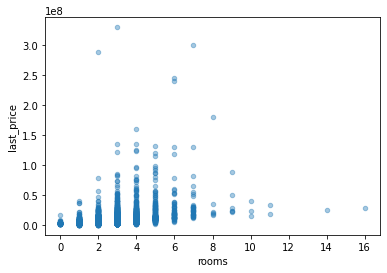

In [88]:
# постороим график
df.plot(x='rooms', y='last_price', kind='scatter', alpha=0.4)
None

In [89]:
# вычислим коэффициент корреляции Пирсона, чтобы оценить характер связи
df['rooms'].corr(df['last_price'])

0.3961695974281627

**Вывод:**

Положительная корреляция предполагает, что в целом по мере увеличения количества комнат в квартире общая стоимость также имеет тенденцию к увеличению. Это соответствует распространенному мнению, что большие квартиры с большим количеством комнат, как правило, стоят дороже. При этом, значение 0,396 указывает на то, что связь относительно слабая.

**Есть ли зависимость между этажом квартиры и ценой квартиры?**

In [90]:
# создадим сводную таблицу для расчета средней 'last_price' для каждой 'floor_category'
floor_category_pivot = df.pivot_table(index='floor_category', values='last_price', aggfunc=['mean', 'count', 'median'])
floor_category_pivot.columns = ['mean', 'count', 'median']

In [91]:
# отсортируем таблицу по убыванию
floor_category_pivot.sort_values('median', ascending=False)

,mean,count,median
floor_category,,,
другой,6.947727e+06,9931,5000000
последний,6.949874e+06,1944,4550000
первый,5.097232e+06,1699,4100000


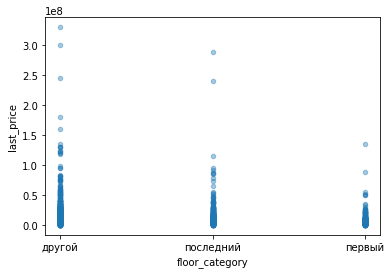

In [92]:
# постороим график
df.plot(x='floor_category', y='last_price', kind='scatter', alpha=0.4)
None

**Вывод:**

Согласно графику цена квартир расположенных на первом этаже ниже цены тех, которые расположены на верхнем этаже здания. При этом квартиры между первым и последним этажами имеют самую высокую стоимость среди представленных категорий.

**Есть ли зависимость между датой размещения объявления о продаже и ценой объекта недвижимости?**

Проведем анализ взаимосвязи между датой размещения объявления о продаже и стоимостью квартир, оценивая отдельно такие категории как: *день недели, месяц, год.*

In [93]:
# создадим сводную таблицу для расчета средней 'last_price' для каждой 'day_exposed'
day_exposed_pivot = df.pivot_table(index='day_exposed', values='last_price', aggfunc=['mean', 'count', 'median'])
day_exposed_pivot.columns = ['mean', 'count', 'median']

In [94]:
# отсортируем таблицу по убыванию
day_exposed_pivot.sort_values('median', ascending=False)

,mean,count,median
day_exposed,,,
1,6.781085e+06,2490,4994500
0,6.921969e+06,2222,4950000
2,6.653041e+06,2251,4900000
3,6.951126e+06,2485,4900000
4,6.517669e+06,2163,4750000
6,6.527675e+06,888,4700000
5,6.287694e+06,1075,4650000


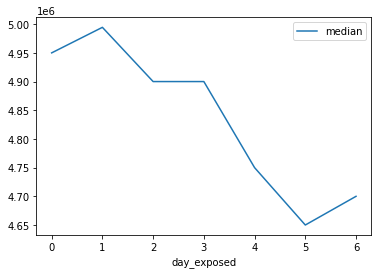

In [95]:
# постороим график
day_exposed_pivot.plot(y='median')
None

**Вывод:**

Согласно графику, довольно высокая цена квартир отмечается в объявлениях размещенных в понедельник, и во **вторник** достигает своего пика. То есть, по вторникам продавцы недвижимости объявляют самые высокие цены. В среду стоимость квартир в объявлениях несколько снижается и остается неизменной в четверг. Далее цена стремительно падает и достигает своей нижней отметки в объявлениях размещенных в **субботу**. Вероятно это связано с целью привлечь покупателя, который как раз в свободный от работы день займётся поисками желанной квартиры. Или, менее корыстное предположение — расслабленные субботним днём и в приподнятом настроении продавцы становятся более щедры, размещая объявления о продаже квартир. В воскресенье цена снова начинает расти.

In [96]:
# создадим сводную таблицу для расчета средней 'last_price' для каждой 'month_exposed'
month_exposed_pivot = df.pivot_table(index='month_exposed', values='last_price', aggfunc=['mean', 'count', 'median'])
month_exposed_pivot.columns = ['mean', 'count', 'median']

In [97]:
# отсортируем таблицу по убыванию
month_exposed_pivot.sort_values('median', ascending=False)

,mean,count,median
month_exposed,,,
4,7.180441e+06,1397,5000000
1,7.008513e+06,847,4950000
2,6.685524e+06,1571,4950000
12,7.180409e+06,856,4950000
7,6.944868e+06,986,4902000
8,6.742073e+06,1025,4900000
9,6.750406e+06,1155,4850000
11,6.585617e+06,1355,4850000
5,6.910471e+06,672,4800000


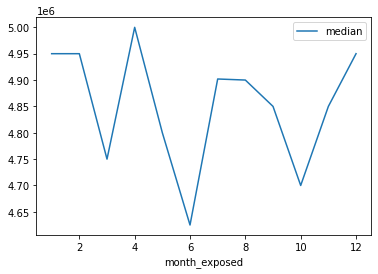

In [98]:
# постороим график
month_exposed_pivot.plot(y='median')
None

**Вывод:**

График показывает устойчиво высокую стоимость квартир в объявлениях размещенных в зимние месяцы (декабрь, январь, февраль). В марте цены существенно, но не на долго снижаются, а в **апреле** достигают своего самого высокого пика в течение года. Однако уже в **июне** продавцы недвижимости объявляют самые низкие цены. В июле и августе стоимость квартир в объявлениях снова довольно высока и к октябрю существенно падает, чтобы начать расти к зиме. График взлётов и падений отражает захватывающий путь желающих продать недвижимость равно как и желающих её приобрести.

In [99]:
# создадим сводную таблицу для расчета средней 'last_price' для каждой 'year_exposed'
year_exposed_pivot = df.pivot_table(index='year_exposed', values='last_price', aggfunc=['mean', 'count', 'median'])
year_exposed_pivot.columns = ['mean', 'count', 'median']

In [100]:
# отсортируем таблицу по убыванию
year_exposed_pivot.sort_values('median', ascending=False)

,mean,count,median
year_exposed,,,
2014,1.162210e+07,73,7580000
2015,9.214701e+06,580,5597700
2019,6.898636e+06,2070,5200000
2016,6.767709e+06,1338,4845000
2018,6.123558e+06,5292,4725000
2017,6.925952e+06,4221,4700000


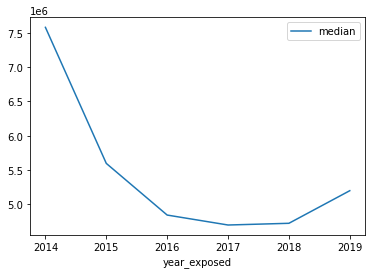

In [101]:
# постороим график
year_exposed_pivot.plot(y='median')
None

В целом график отражает общую картину. Однако дополнительно рассмотрим как изменялась цена за м² в зависомости от года объявления о продаже.

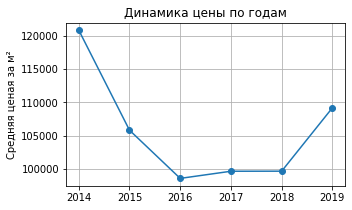

In [102]:
# сгруппируем данные по 'year_exposed' и вычислим среднюю стоимость м²
yearly_mean_price = df.groupby('year_exposed')['price_per_sqm'].mean()
# построим график
plt.figure(figsize=(5, 3))
plt.plot(yearly_mean_price.index, yearly_mean_price.values, marker='o', linestyle='-')
plt.title('Динамика цены по годам')
plt.ylabel('Средняя ценая за м²')
plt.grid(True)
plt.show()

**Вывод:**

- Согласно графику, самая высокая цена недвижимости отмечается в объявлениях размещенных в 2014 году. В среднем цена за м² составляла 120 000 рублей. 
- Объявляемая продавцами стоимость квартир стремительно падает к 2016 году, где цена за м² находится в районе 50 000 рублей. Далее снижение цен немного замедляется. 
- С 2017 по 2018 цены стабилизируются на уровне 100 000 рублей, а с 2018 года наблюдается не большой рост.

**Определим населённые пункты с самой высокой и низкой стоимостью квадратного метра.**

In [103]:
# создадим сводную таблицу для расчета средней 'price_per_sqm' для каждой 'locality_name'
locality_name_pivot = df.pivot_table(index='locality_name', values='price_per_sqm', aggfunc=['mean', 'count'])
locality_name_pivot.columns = ['mean', 'count']

In [104]:
# отсортируем таблицу и выведем 10 населённых пунктов с наибольшим числом объявлений 
locality_name_pivot.sort_values('count', ascending=False).head(10)

,mean,count
locality_name,,
Санкт-Петербург,114867.173706,9496
Всеволожск,67604.199016,254
Пушкин,103831.563318,220
поселок Шушары,79236.459561,205
поселок Мурино,87263.103911,202
Колпино,75927.274031,196
Петергоф,85228.159155,142
Гатчина,69708.342941,136
поселок Парголово,91017.153308,133


Оценим стоимость квадратного метра в топ 10 населенных пунктах.

In [105]:
# создадим переменную для хранения отсортированной таблицы
locality_name_sorted = locality_name_pivot.sort_values('count', ascending=False).head(10)

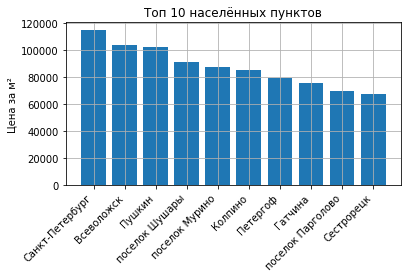

In [106]:
# сохраним данные из 'locality_name_sorted' в отдельные переменные
# название населённого пункта
localities = locality_name_sorted.index 
# значение с ценой за м²
counts = locality_name_sorted['mean'].sort_values(ascending=False)
# построим столбчатую диаграмму
plt.figure(figsize=(6, 3))
plt.bar(localities, counts)
# укажем наименования
plt.ylabel('Цена за м²')
plt.title('Топ 10 населённых пунктов')
# повернем метки по оси X на 45 градусов
plt.xticks(rotation=45, ha="right")
# линия сетки на графике
plt.grid(True)
# выведем диаграмму
plt.show()

In [107]:
# найдём населенные пункты с самой высокой средней ценой в наборе
locality_name_sorted[locality_name_sorted['mean'] == locality_name_sorted['mean'].max()]

,mean,count
locality_name,,
Санкт-Петербург,114867.173706,9496


In [108]:
# найдём населенные пункты с самой низкой средней ценой в наборе
locality_name_sorted[locality_name_sorted['mean'] == locality_name_sorted['mean'].min()]

,mean,count
locality_name,,
Всеволожск,67604.199016,254


**Вывод:**

Среди 10 населённых пунктов с наибольшим числом объявлений самая высокая стоимость квадратного метра обнаружена в Санкт-Петербурге, что вполне предсказуемо. Вместе с тем, самая низкая стоимость квадратного метра отмечается во Всеволожске.

**Определим, как стоимость объектов зависит от расстояния до центра города Санкт-Петербурга.**

In [109]:
# отфильтруем данные 
distance_to_center_km_pivot = df.query('locality_name == "Санкт-Петербург"').pivot_table(index='distance_to_center_km', values='price_per_sqm', aggfunc='mean')
distance_to_center_km_pivot = distance_to_center_km_pivot.reset_index()
distance_to_center_km_pivot

,distance_to_center_km,price_per_sqm
0,0.0,182871.621875
1,1.0,176088.118359
2,2.0,163191.641005
3,3.0,119147.266422
4,4.0,130233.026196
5,5.0,137104.636210
6,6.0,144322.599039
7,7.0,157948.083740
8,8.0,125499.809011
9,9.0,116658.722695


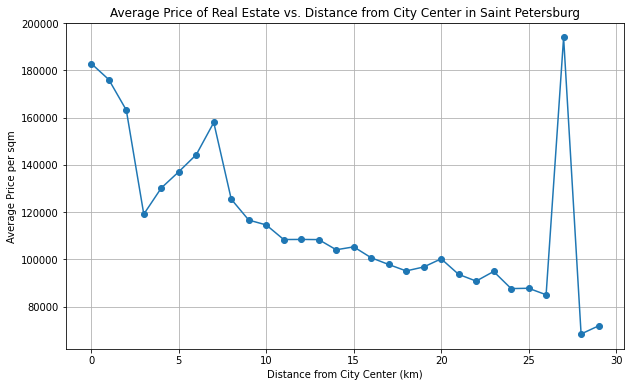

In [110]:
# построим линейный график, чтобы показать изменения средней цены за километр от центра
plt.figure(figsize=(10, 6))
plt.plot(distance_to_center_km_pivot['distance_to_center_km'], distance_to_center_km_pivot['price_per_sqm'], marker='o', linestyle='-')

# установим метки и название
plt.xlabel('Distance from City Center (km)')
plt.ylabel('Average Price per sqm')
plt.title('Average Price of Real Estate vs. Distance from City Center in Saint Petersburg')

# линия сетки на графике
plt.grid(True)

# показать график
plt.show()

 **Вывод:**
 
Согласно информации местного туристического сайта для Петербуржцев центром является территория от набережной Обводного канала до реки Большой Невки. Протяженность этого расстояния на Google Maps составляет примерно 12 км.

График изменения средней цены недвижимости для каждого километра от центра Санкт-Петербурга показывает, что средняя цена недвижимости за м² снижается по мере удаления от центра города. В пределах центра (принятые нами за истину 12 км) стоимость меняется, график имеет спадающие и возрастающие пики, что может быть связано с определенными застройками и локациями менее привлекательными для покупателей. Вместе с тем, наблюдается резкий пик высокой стоимости на расстоянии около 27 км от центра города, который может быть связан с выбросами в данных, что требует более критического внимания в случае необходимости дальнейшего анализа.

### Общий вывод

На архивных данных сервиса Яндекс.Недвижимость о продаже квартир в Санкт-Петербурге и соседних населённых пунктах было проведено исследование с **целью** оценить и установить параметры для определения рыночной стоимости объектов недвижимости.

Работа включала предварительный этап и собственно исследование.

На **предварительном этапе** мы изучили основную информацию о датафрейме, определили количество и тип данных в таблице, обработали аномальные значения и пропуски, изменили тип значений в некоторых столбцах, избавились от дубликатов и убедились, что все данные готовы к более подробному исследовательскому анализу. 

Оценка рыночной стоимости объектов недвижимости в данном исследовании исходила из наблюдаемых зависимостей между ценой объекта и такими параметрами как: 
- общая площадь 
- жилая площадь
- площадь кухни
- количество комнат
- высота потолков
- тип этажа квартиры
- расстояние до центра города

На **этапе ииследования** мы изучили какие факторы больше всего влияют на общую стоимость объекта. Исследовательский анализ позволил в некоторой степени оценить влияние определенных параметров на цену объектов недвижимости. В частности было установлено:

**1) Как быстро продавались квартиры?** 

На основе данных о том, сколько дней было размещено объявление (от публикации до снятия), было установлено, что продажи до 50 дней после размещения объявления можно считать быстрыми. В то время как долгими можно считать продажи от 200 дней и более.

**2) Есть ли зависимость между ценой квартиры и общей площадью, жилой площадью и площадью кухни?** 

Квартиры бо́льшего размера *(умеренная связь при r = 0,686)*, с бо́льшей жилой площадью *(умеренная связь при r = 0.597)* и кухонным пространством *(умеренная связь при r = 0.519)* как правило, имеют более высокие цены.

**3) Есть ли зависимость между количеством комнат и ценой объекта недвижимости?**

В целом по мере увеличения количества комнат в квартире общая стоимость также имеет тенденцию к увеличению. Это соответствует распространенному мнению, что большие квартиры с большим количеством комнат, как правило, стоят дороже. При этом, связь относительно слабая *(r = 0,396)*.

**4) Есть ли зависимость между этажом квартиры и ценой квартиры?**

Квартиры между первым и последним этажами имеют самую высокую стоимость среди представленных категорий.

**5) Есть ли зависимость между датой размещения объявления о продаже и ценой объекта недвижимости?**
- Объявления с самыми высокими ценами продавцы недвижимости размещают по вторникам, а по субботам, напротив — с самыми низкими.
- В апреле стоимость квартир в объявлениях достигает своего высокого пика, июнь —  месяц объявлений самых низких цен на недвижимость.
- Период с 2014 по 2016 не самый оптимистичный для продавцов недвижимости — цена постоянно снижалась *(с 120 000 до 50 000 соответственно)*, плавный рост начался с 2018, а к 2019 средняя стоимость м2 достигла 100 000 рублей.

**6) Населённые пункты с самой высокой и низкой стоимостью квадратного метра.**

В номинации самая высокая стоимость недвижимости за м² город `Санкт-Петербург` возглавляет топ 10 среди населённых пунктов с наибольшим числом объявлений. Самая низкая цена за м² зафиксирована во `Всеволожске`.

**7) Как стоимость объектов зависит от расстояния до центра города Санкт-Петербурга?**
- Средняя цена недвижимости за м² снижается по мере удаления от центра города. 
- В пределах центра стоимость колеблется от 180 000 до 110 000 рублей за м².

Обнаруженные связи между параметрами дают определенное представление о том, что может повлиять на рыночную стоимость объектов недвижимости. Вместе с тем, следует помнить, что корреляция не подразумевает причинно-следственной связи, поэтому, хотя между рассмотренными параметрами существует связь, это не обязательно означает, что один определенный параметр напрямую приводит к увеличению общей стоимости квартиры. 

Существует множество исключений, и другие факторы, которые вероятно, играют существенную роль в определении цен на квартиры. Поэтому при построении сложных автоматизированных моделей, которые позволяют отслеживать аномалии и мошенническую деятельность важно учитывать системность этих факторов.